# Loan Status Prediction


In [9]:
import numpy as np
import pandas as pd
import seaborn as sns

In [10]:
loan_dataset=pd.read_csv(r"C:\Users\yedla\Downloads\train_u6lujuX_CVtuZ9i (1).csv")

In [11]:
type(loan_dataset)

pandas.core.frame.DataFrame

In [12]:
loan_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


# Columns explanation
##### The 'dependents' column is the # of people dependent on the member(loan applicant) in that particular family.
##### 'CoapplicantIncome' column is the income of the spouse or their(loan applicant) family member
##### 'Loan_Amount_Term' column is the Duration period for which they are applying the loan
##### 'Credit_History' column has either 0 or 1. 1 represents the loan applicant has good credit history like clearing all the bills on time and probably may get loan sanctioned. 0 means the applicant's credit history is bad nad may not get loan sactioned
##### Loan_Status(Y/N). Y loan is approved, N means Loan is not approved

In [13]:
loan_dataset.shape

(614, 13)

In [14]:
loan_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [15]:
loan_dataset.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [16]:
loan_dataset.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [17]:
loan_dataset=loan_dataset.dropna()

In [18]:
loan_dataset.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [19]:
loan_dataset.replace({'Loan_Status':{'N':0,'Y':1}},inplace=True)

C:\Users\yedla\AppData\Local\Temp\ipykernel_22500\2101030196.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  loan_dataset.replace({'Loan_Status':{'N':0,'Y':1}},inplace=True)


In [20]:
loan_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,1


In [21]:
loan_dataset['Dependents'].value_counts()

Dependents
0     274
2      85
1      80
3+     41
Name: count, dtype: int64

In [22]:
loan_dataset.replace({'3+':4},inplace=True)

In [23]:
loan_dataset['Dependents'].value_counts()

Dependents
0    274
2     85
1     80
4     41
Name: count, dtype: int64

<Axes: xlabel='Education', ylabel='count'>

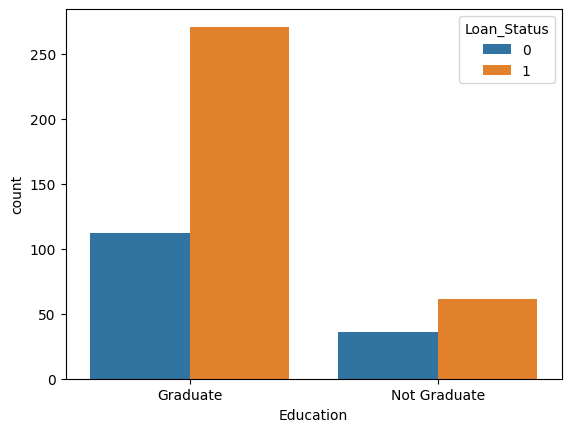

In [24]:
sns.countplot(x='Education',hue='Loan_Status',data=loan_dataset)

#### From the above plot it is clear that the number of loan approvals for Graduated people is more than non Graduated people. this means if a person is educated and graduated in most of the cases he or she may have higher chances of getting the loan approved


<Axes: xlabel='Married', ylabel='count'>

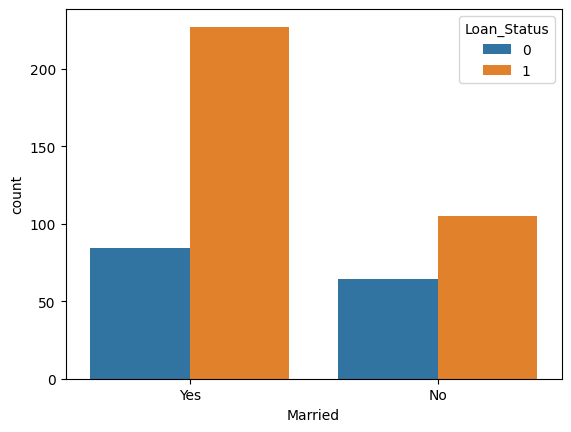

In [25]:
sns.countplot(x='Married',hue='Loan_Status',data=loan_dataset)

In [26]:
loan_dataset.replace({'Gender':{'Male':1,'Female':0},'Married':{'Yes':1,'No':0},'Education':{'Graduate':1,'Not Graduate':0},'Self_Employed':{'Yes':1,'No':0},'Property_Area':{'Rural':0,'Semi_Urban':1,'Urban':2}},inplace=True)

C:\Users\yedla\AppData\Local\Temp\ipykernel_22500\612403756.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  loan_dataset.replace({'Gender':{'Male':1,'Female':0},'Married':{'Yes':1,'No':0},'Education':{'Graduate':1,'Not Graduate':0},'Self_Employed':{'Yes':1,'No':0},'Property_Area':{'Rural':0,'Semi_Urban':1,'Urban':2}},inplace=True)


In [27]:
loan_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,1
5,LP001011,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,2,1


In [58]:
cols = ['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']

In [59]:
from sklearn.preprocessing import StandardScaler
st = StandardScaler()
X[cols]=st.fit_transform(X[cols])

In [60]:
X

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
1,1,1,1,1,0,0.711333,-0.027952,-0.208089,0.275542,1.0,0
2,1,1,0,1,1,-0.492872,-0.604633,-0.979001,0.275542,1.0,1
3,1,1,0,0,0,-0.822080,0.297100,-0.307562,0.275542,1.0,1
4,1,0,0,1,0,1.213807,-0.604633,-0.046446,0.275542,1.0,1
5,1,1,2,1,1,1.005887,0.999978,1.520245,0.275542,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,1,0,-0.588169,-0.604633,-0.916831,0.275542,1.0,0
610,1,1,3,1,0,0.468759,-0.604633,-1.302286,-2.487549,1.0,0
611,1,1,1,1,0,1.560341,-0.512854,1.346168,0.275542,1.0,1
612,1,1,2,1,0,1.491035,-0.604633,0.525520,0.275542,1.0,1


In [67]:
y=loan_dataset['Loan_Status']

In [68]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
import numpy as np

In [69]:
model_df={}
def model_val(model,X,y):
    X_train,X_test,y_train,y_test=train_test_split(X,y,
                                                   test_size=0.20,
                                                   random_state=42)
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    print(f"{model} accuracy is {accuracy_score(y_test,y_pred)}")
    
    score = cross_val_score(model,X,y,cv=5)
    print(f"{model} Avg cross val score is {np.mean(score)}")
    model_df[model]=round(np.mean(score)*100,2)

## Logistic Regression

In [70]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model_val(model,X,y)

LogisticRegression() accuracy is 0.8229166666666666
LogisticRegression() Avg cross val score is 0.8


## Suppor Vector Model

In [71]:
from sklearn import svm
model = svm.SVC()
model_val(model,X,y)

SVC() accuracy is 0.8020833333333334
SVC() Avg cross val score is 0.8020833333333334


## Decision Tree Classifier

In [72]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model_val(model,X,y)

DecisionTreeClassifier() accuracy is 0.6875
DecisionTreeClassifier() Avg cross val score is 0.7354166666666667


## Random Forest Classifier

In [73]:
from sklearn.ensemble import RandomForestClassifier
model =RandomForestClassifier()
model_val(model,X,y)

RandomForestClassifier() accuracy is 0.8125
RandomForestClassifier() Avg cross val score is 0.8041666666666666


## Hyper Parameter Tuning

In [74]:
from sklearn.model_selection import RandomizedSearchCV

#### For Logistic Regression

In [75]:
log_reg_grid={"C":np.logspace(-4,4,20),
             "solver":['liblinear']}

In [76]:
rs_log_reg=RandomizedSearchCV(LogisticRegression(),
                   param_distributions=log_reg_grid,
                  n_iter=20,cv=5,verbose=True)

In [77]:
rs_log_reg.fit(X,y)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


,estimator,LogisticRegression()
,param_distributions,"{'C': array([1.0000...00000000e+04]), 'solver': ['liblinear']}"
,n_iter,20
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,True
,pre_dispatch,'2*n_jobs'
,random_state,None
,error_score,nan


In [78]:
rs_log_reg.best_score_

np.float64(0.8083333333333333)

In [79]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': np.float64(0.23357214690901212)}

#### For Support Vector Model

In [80]:
svc_grid = {'C':[0.25,0.50,0.75,1],"kernel":["linear"]}

In [81]:
rs_svc=RandomizedSearchCV(svm.SVC(),
                  param_distributions=svc_grid,
                   cv=5,
                   n_iter=20,
                  verbose=True)

In [82]:
rs_svc.fit(X,y)

C:\Users\yedla\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_search.py:317: UserWarning: The total space of parameters 4 is smaller than n_iter=20. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 5 folds for each of 4 candidates, totalling 20 fits


,estimator,SVC()
,param_distributions,"{'C': [0.25, 0.5, ...], 'kernel': ['linear']}"
,n_iter,20
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,True
,pre_dispatch,'2*n_jobs'
,random_state,None
,error_score,nan


In [83]:
rs_svc.best_score_

np.float64(0.8083333333333333)

In [84]:
rs_svc.best_params_

{'kernel': 'linear', 'C': 0.25}

#### For Random Forest Classifier

In [85]:
RandomForestClassifier()

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [86]:
rf_grid={'n_estimators':np.arange(10,1000,10),
  'max_features':['auto','sqrt'],
 'max_depth':[None,3,5,10,20,30],
 'min_samples_split':[2,5,20,50,100],
 'min_samples_leaf':[1,2,5,10]
 }

In [87]:
rs_rf=RandomizedSearchCV(RandomForestClassifier(),
                  param_distributions=rf_grid,
                   cv=5,
                   n_iter=20,
                  verbose=True)

In [88]:
rs_rf.fit(X,y)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


C:\Users\yedla\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_validation.py:516: FitFailedWarning: 
45 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
45 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\yedla\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\yedla\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py", line 1356, in wrapper
    estimator._validate_params()
  File "C:\Users\yedla\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py", line 469, in _validate_params
    valida

,estimator,RandomForestClassifier()
,param_distributions,"{'max_depth': [None, 3, ...], 'max_features': ['auto', 'sqrt'], 'min_samples_leaf': [1, 2, ...], 'min_samples_split': [2, 5, ...], ...}"
,n_iter,20
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,True
,pre_dispatch,'2*n_jobs'
,random_state,None
,error_score,nan


In [89]:
rs_rf.best_score_

np.float64(0.8083333333333333)

In [90]:
rs_rf.best_params_

{'n_estimators': np.int64(500),
 'min_samples_split': 100,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': None}

##### LogisticRegression score Before Hyperparameter Tuning: 82.3
##### LogisticRegression score after Hyperparameter Tuning: 80.83

##### SVC score Before Hyperparameter Tuning: 80.21
##### SVC score after Hyperparameter Tuning: 80.83

##### RandomForestClassifier score Before Hyperparameter Tuning: 81.25
##### RandomForestClassifier score after Hyperparameter Tuning: 80.83
